## To discuss the defomation mapping of three types of specimens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def show_result(change_rate_map, nuclei_true, frame_num):
    dsiplay = change_rate_map

    lim_min = np.max(np.abs(dsiplay[:,:,frame_num]))*-1
    lim_max = np.max(np.abs(dsiplay[:,:,frame_num]))

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.invert_yaxis()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)

    cm = plt.cm.seismic.copy()
    cm.set_bad((0, 0, 0, 1))

    mesh = ax.pcolormesh(np.ma.array(dsiplay[:,:,frame_num], mask=nuclei_true[:,:,frame_num]==0), cmap = cm)
    mesh.set_clim(lim_min,lim_max)

    fig.colorbar(mesh,cax=cax)

    

def show_result_custom(change_rate_map,  nuclei_true, frame_num, lim_min, lim_max):
    dsiplay = change_rate_map

    lim_min = lim_min
    lim_max = lim_max

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.invert_yaxis()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)

    cm = plt.cm.seismic.copy()
    cm.set_bad((0, 0, 0, 1))

    mesh = ax.pcolormesh(np.ma.array(dsiplay[:,:,frame_num], mask=nuclei_true[:,:,frame_num]==0), cmap = cm)
    mesh.set_clim(lim_min,lim_max)

    fig.colorbar(mesh,cax=cax)

#### region
- elastic region
- plastic region
- before fraucture

#### choosen parameters
- change in area
- change in eccentricity
- change in aspect_axis
- change in aspect_bbox
- change in feret

#### r-H-5

In [3]:
col_names = ["s", "V"]
df_ss = pd.read_csv("r-H-5.CSV", names=col_names)

span = 16/1000
width = 9.94/1000
thick = 1.453/1000

load =[]
stress_rh5 = []

V = df_ss.V[:192]
load = (10/(5000*2.5*(46.67*10**-6)))*-V
stress_rh5 = (3*load*span)/(2*width*thick**2)/10**6

displacement = []
strain_rh5 = []

s = df_ss.s[:192]
displacement = s*(1/60)
strain_rh5 = (6*thick*displacement/1000)/(span**2)

(0.0, 15.0)

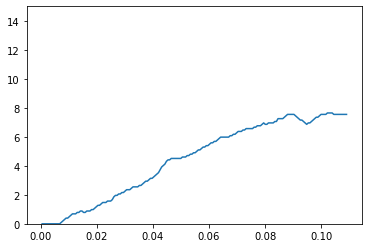

In [4]:
plt.plot(strain_rh5, stress_rh5)
plt.ylim(0,15)

In [5]:
strain_rh5[105]

0.06016328125

In [6]:
num_elastic = 17
num_plastic = 105
num_last = -1

num_list = [17,105,-1]

In [8]:
map_list = ['area_change', 'ecc_change', 'aspect_axis_change',
           'aspect_bbox_change', 'feret_change']

s_s_region = ['elastic region', 'plastic region', 'before the fraucture']

In [9]:
HR_map = np.load('./seg_results/r-H-5_map.npz')

limitation_list = [100, 100, 100, 100, 100]

CPU times: user 2min 52s, sys: 12.1 s, total: 3min 4s
Wall time: 3min 4s


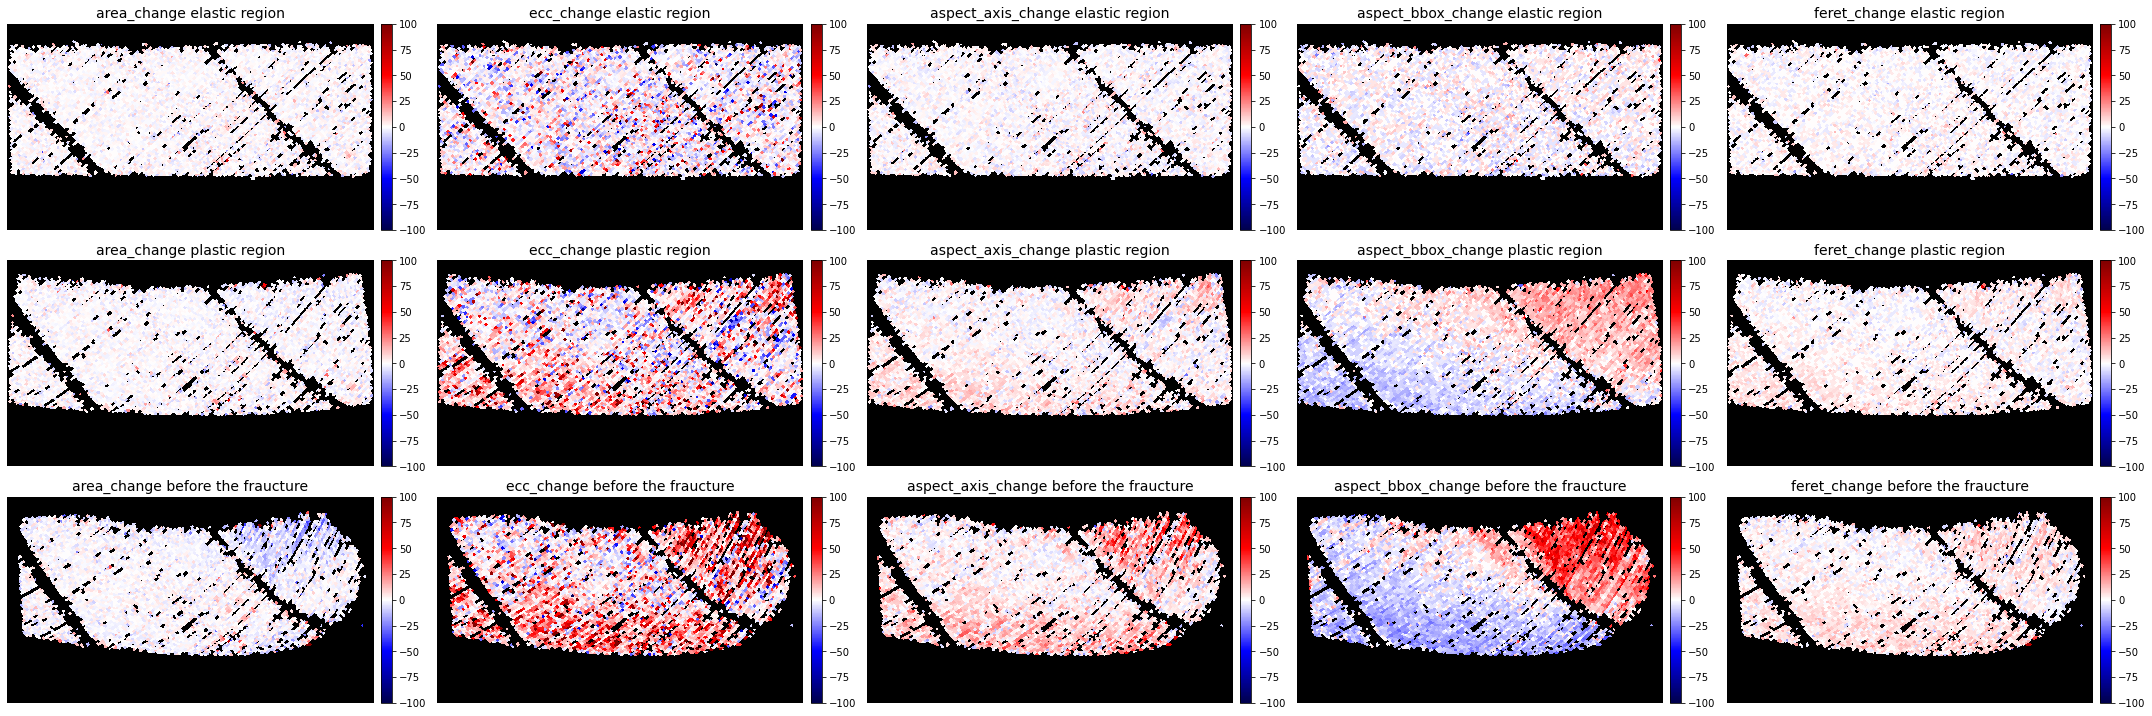

In [10]:
%%time
fig, ax = plt.subplots(3,5, figsize=(30,10))

for i, num in enumerate(num_list):
    for j, map_name in enumerate(map_list):
        HR_map_single = np.nan_to_num(HR_map[map_name][:,:,num], copy=False, nan=0.0, posinf=0.0, neginf=0.0)
        
        lim_min = limitation_list[j]*-1
        lim_max = limitation_list[j]
        
        divider = make_axes_locatable(ax[i,j])
        cax = divider.append_axes("right", size="3%", pad=0.1)

        cm = plt.cm.seismic.copy()
        cm.set_bad((0, 0, 0, 1))
        
        mesh = ax[i,j].pcolormesh(np.ma.array(HR_map_single, mask=HR_map['nuclei'][:,:,num]==0), cmap = cm)
        ax[i,j].set_aspect('equal')
        ax[i,j].invert_yaxis()
        ax[i,j].axis('off')
        ax[i,j].set_title(map_name + ' ' + s_s_region[i], fontsize=14)
        mesh.set_clim(lim_min,lim_max)
        fig.colorbar(mesh,cax=cax)
fig.tight_layout()

#### HF-4

In [11]:
col_names = ["s", "V"]
df_ss = pd.read_csv("HF-4.CSV", names=col_names)

span = 16/1000
width = 9.84333/1000
thick = 1.54000/1000

load =[]
stress_hf4 = []

V = df_ss.V[:192]
load = (10/(5000*2.5*(46.67*10**-6)))*-V
stress_hf4 = (3*load*span)/(2*width*thick**2)/10**6

displacement = []
strain_hf4 = []

s = df_ss.s[:192]
displacement = s*(1/60)
strain_hf4 = (6*thick*displacement/1000)/(span**2)

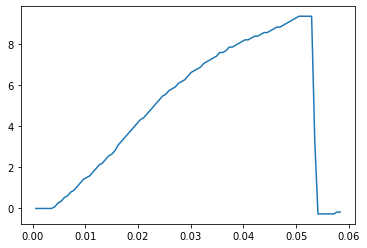

In [12]:
plt.plot(strain_hf4, stress_hf4)

In [13]:
strain_hf4[70]

0.04271093750000001

In [14]:
num_elastic = 15
num_plastic = 70
num_last = -1

num_list = [15,70,-1]

In [15]:
HF_map = np.load('./seg_results/HF-4_map.npz')

limitation_list = [50, 50, 50, 50, 50]

CPU times: user 1min 18s, sys: 5.5 s, total: 1min 23s
Wall time: 1min 23s


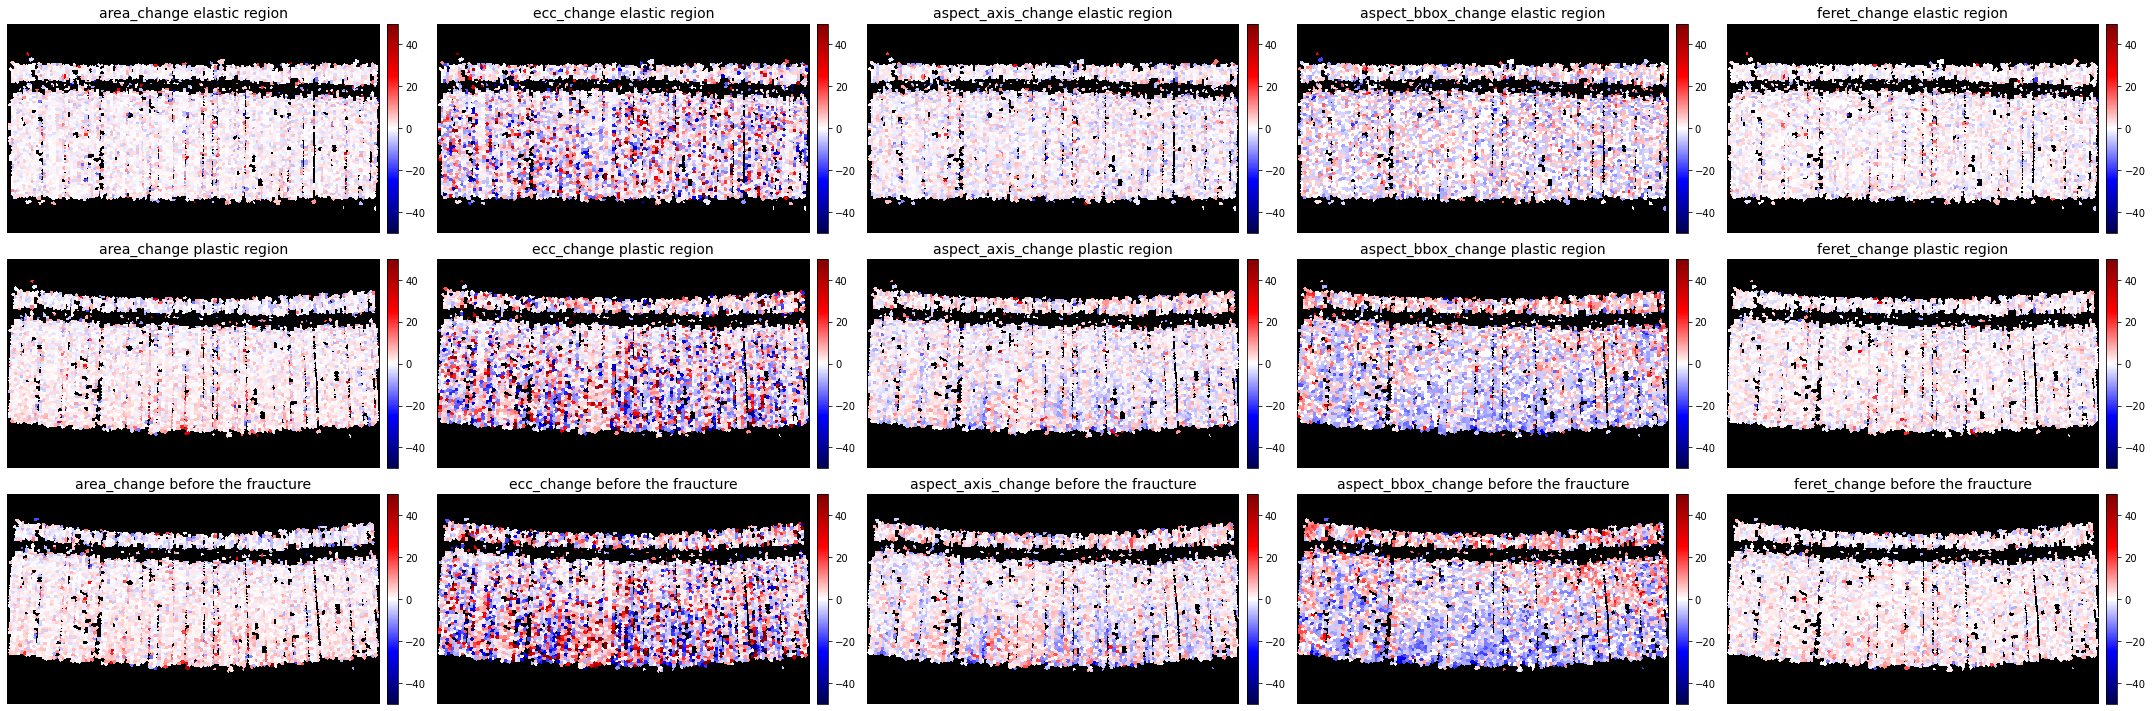

In [16]:
%%time
fig, ax = plt.subplots(3,5, figsize=(30,10))

for i, num in enumerate(num_list):
    for j, map_name in enumerate(map_list):
        HF_map_single = np.nan_to_num(HF_map[map_name][:,:,num], copy=False, nan=0.0, posinf=0.0, neginf=0.0)
        
        lim_min = limitation_list[j]*-1
        lim_max = limitation_list[j]
        
        divider = make_axes_locatable(ax[i,j])
        cax = divider.append_axes("right", size="3%", pad=0.1)

        cm = plt.cm.seismic.copy()
        cm.set_bad((0, 0, 0, 1))
        
        mesh = ax[i,j].pcolormesh(np.ma.array(HF_map_single, mask=HF_map['nuclei'][:,:,num]==0), cmap = cm)
        ax[i,j].set_aspect('equal')
        ax[i,j].invert_yaxis()
        ax[i,j].axis('off')
        ax[i,j].set_title(map_name + ' ' + s_s_region[i], fontsize=14)
        mesh.set_clim(lim_min,lim_max)
        fig.colorbar(mesh,cax=cax)
fig.tight_layout()

#### q-H-2

In [17]:
col_names = ["s", "V"]
df_ss = pd.read_csv("q-H-2.CSV", names=col_names)

span = 16/1000
width = 9.836666667/1000
thick = 1.613333333/1000

load =[]
stress_hf4 = []

V = df_ss.V[:192]
load = (10/(5000*2.5*(46.67*10**-6)))*-V
stress_qh2 = (3*load*span)/(2*width*thick**2)/10**6

displacement = []
strain_qh2 = []

s = df_ss.s[:192]
displacement = s*(1/60)
strain_qh2 = (6*thick*displacement/1000)/(span**2)

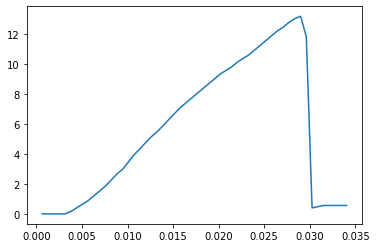

In [18]:
plt.plot(strain_qh2, stress_qh2)

In [19]:
strain_qh2[33]

0.021427083328906252

In [20]:
num_elastic = 10
num_plastic = 33
num_last = -1

num_list = [15,33,-1]

In [21]:
HQ_map = np.load('./seg_results/q-H-2_map.npz')

limitation_list = [30, 30, 30, 30, 30]

CPU times: user 40.7 s, sys: 3.83 s, total: 44.6 s
Wall time: 44.6 s


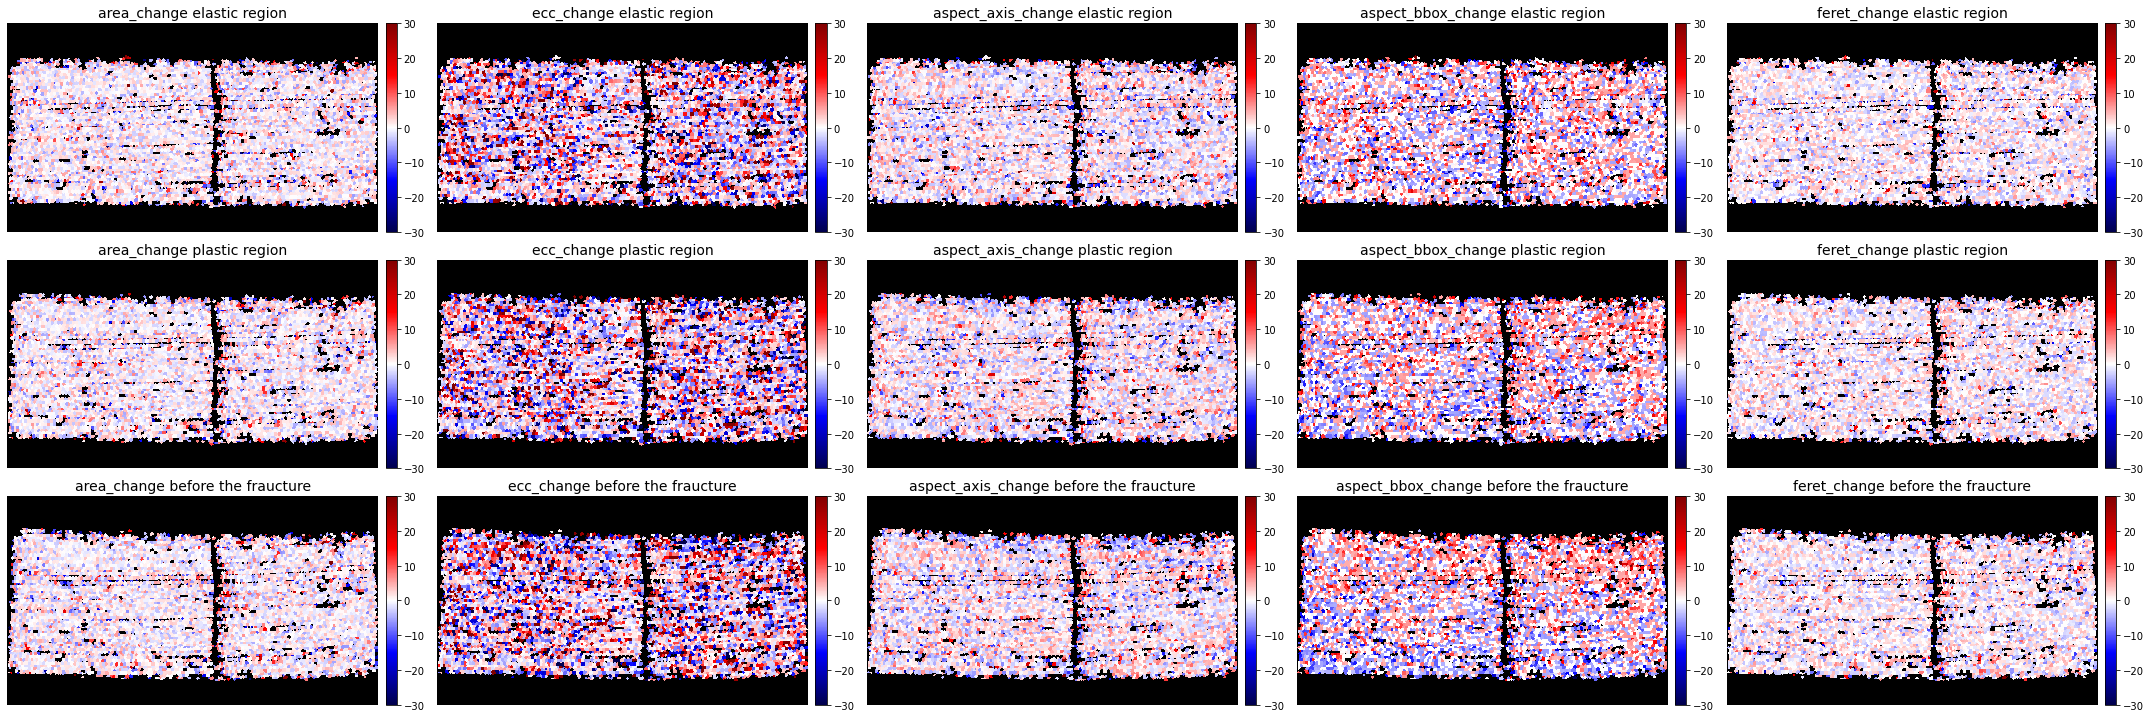

In [22]:
%%time
fig, ax = plt.subplots(3,5, figsize=(30,10))

for i, num in enumerate(num_list):
    for j, map_name in enumerate(map_list):
        HQ_map_single = np.nan_to_num(HQ_map[map_name][:,:,num], copy=False, nan=0.0, posinf=0.0, neginf=0.0)
        
        lim_min = limitation_list[j]*-1
        lim_max = limitation_list[j]
        
        divider = make_axes_locatable(ax[i,j])
        cax = divider.append_axes("right", size="3%", pad=0.1)

        cm = plt.cm.seismic.copy()
        cm.set_bad((0, 0, 0, 1))
        
        mesh = ax[i,j].pcolormesh(np.ma.array(HQ_map_single, mask=HQ_map['nuclei'][:,:,num]==0), cmap = cm)
        ax[i,j].set_aspect('equal')
        ax[i,j].invert_yaxis()
        ax[i,j].axis('off')
        ax[i,j].set_title(map_name + ' ' + s_s_region[i], fontsize=14)
        mesh.set_clim(lim_min,lim_max)
        fig.colorbar(mesh,cax=cax)
fig.tight_layout()